In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
#creating scenarios for identical power of multiple technologies
scennames = ['test'] #might need a PV ICE baseline too
MATERIALS = ['glass','silver','silicon', 'copper', 'aluminium_frames'] #'encapsulant', 'backsheet',
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [3]:
#load in a baseline and materials for modification
import PV_ICE

sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)
for scen in scennames:
    sim1.createScenario(name=scen, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim1.scenario[scen].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [4]:
#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('test', 'mod_degradation',0.2, start_year=2000) 
sim1.modifyScenario('test', 'mod_lifetime', 50, start_year=2000) 
sim1.modifyScenario('test', 'new_Installed_Capacity_[MW]', 0.0, start_year=1995) 
sim1.modifyScenario('test', 'mod_eff', 17.0, start_year=1995) 

#sim1.scenMod_perfectRecycling()
sim1.scenMod_noCircularity()

In [5]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Data trimed, years now encompass  2000  to  2100


In [6]:
sim1.scenario['test'].dataIn_m.loc[20,'new_Installed_Capacity_[MW]'] =100.0 #install 100 MW in 2020 a single year

In [7]:
sim1.scenario['test'].dataIn_m

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
0,2000,0.0,17.0,19.0,23.0,0.6,20.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1,2001,0.0,17.0,19.0,23.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2,2002,0.0,17.0,19.0,23.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
3,2003,0.0,17.0,19.0,23.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4,2004,0.0,17.0,19.0,23.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2096,0.0,17.0,40.0,44.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
97,2097,0.0,17.0,40.0,44.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
98,2098,0.0,17.0,40.0,44.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
99,2099,0.0,17.0,40.0,44.0,0.2,50.0,98.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


In [8]:
sim1.calculateFlows(scenarios='test')

>>>> Calculating Material Flows <<<<

Working on Scenario:  test
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames


>>>> Calculating Energy Flows <<<<

Working on Scenario:  test
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  aluminium_frames


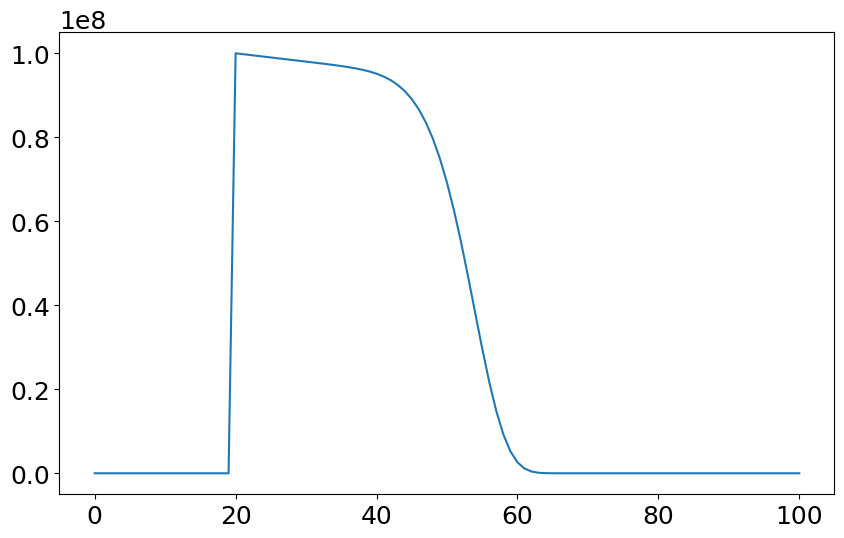

In [9]:
plt.plot(sim1.scenario['test'].dataOut_m['Installed_Capacity_[W]'])

In [10]:
sim1_annual, sim1_cum = sim1.aggregateResults()

In [11]:
#MASS
sim1_cum.filter(like='Module')

,VirginStock_Module_sim1_test_[Tonnes],WasteAll_Module_sim1_test_[Tonnes],WasteEOL_Module_sim1_test_[Tonnes],WasteMFG_Module_sim1_test_[Tonnes]
year,,,,
2000,0.000000,0.000000,0.000000,0.000000
2001,0.000000,0.000000,0.000000,0.000000
2002,0.000000,0.000000,0.000000,0.000000
2003,0.000000,0.000000,0.000000,0.000000
2004,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2096,6755.725359,6755.725359,6309.711258,446.014101
2097,6755.725359,6755.725359,6309.711258,446.014101
2098,6755.725359,6755.725359,6309.711258,446.014101


In [12]:
#ENERGY
sim1.scenario['test'].dataOut_e.cumsum()

,mod_MFG,mod_Install,mod_OandM,mod_Repair,mod_Demount,mod_Store,mod_Resell_Certify,mod_ReMFG_Disassembly,mod_Recycle_Crush,e_out_annual_[Wh]
0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
1,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
3,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
4,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
96,2.018007e+09,5.588235e+06,0.0,0.0,0.064409,0.0,0.0,0.0,0.0,4.763112e+12
97,2.018007e+09,5.588235e+06,0.0,0.0,0.064409,0.0,0.0,0.0,0.0,4.763112e+12
98,2.018007e+09,5.588235e+06,0.0,0.0,0.064409,0.0,0.0,0.0,0.0,4.763112e+12
99,2.018007e+09,5.588235e+06,0.0,0.0,0.064409,0.0,0.0,0.0,0.0,4.763112e+12


In [13]:
energy_mat = pd.DataFrame()
for scen in scennames:
    for mat in MATERIALS:
        # add the scen name as a prefix for later filtering
        scenmatde = sim1.scenario[scen].material[mat].matdataOut_e.add_prefix(str(scen+'_'+mat+'_'))
        #concat into one large df
        energy_mat = pd.concat([energy_mat, scenmatde], axis=1)

energy_mat.tail()

,test_glass_mat_extraction,test_glass_mat_MFG_virgin,test_glass_mat_MFGScrap_LQ,test_glass_mat_MFGScrap_HQ,test_glass_mat_Landfill,test_glass_mat_EoL_ReMFG_clean,test_glass_mat_Recycled_LQ,test_glass_mat_Recycled_HQ,test_silver_mat_extraction,test_silver_mat_MFG_virgin,...,test_copper_mat_Recycled_LQ,test_copper_mat_Recycled_HQ,test_aluminium_frames_mat_extraction,test_aluminium_frames_mat_MFG_virgin,test_aluminium_frames_mat_MFGScrap_LQ,test_aluminium_frames_mat_MFGScrap_HQ,test_aluminium_frames_mat_Landfill,test_aluminium_frames_mat_EoL_ReMFG_clean,test_aluminium_frames_mat_Recycled_LQ,test_aluminium_frames_mat_Recycled_HQ
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
energy_mat.cumsum().loc[100].sum()

109817727894.14105